In [83]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

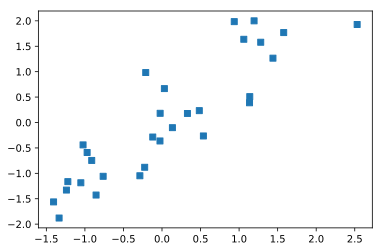

In [84]:
# creating data
N = 30
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

plt.plot(x,y,'s')
plt.show()

In [85]:
ANNreg = nn.Sequential(
    nn.Linear(1,1), # input layer (number of inputs, number of outputs)
    nn.ReLU(),      # activation function
    nn.Linear(1,1)  # output layer (number of inputs, number of outputs)
)

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [86]:
learningrate = .05
lossfunction = nn.MSELoss()
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningrate) # Stochastic gradient descent

In [87]:
epochs = 500
losses = np.zeros(epochs)

for i in range(epochs):
    # Forward pass
    yHat = ANNreg(x)
    
    # Compute losses
    loss = lossfunction(yHat,y)
    losses[i] = loss
    
    # Back propagation
    optimizer.zero_grad() # Zero gradients
    loss.backward()
    optimizer.step()

print('Done')    

Done


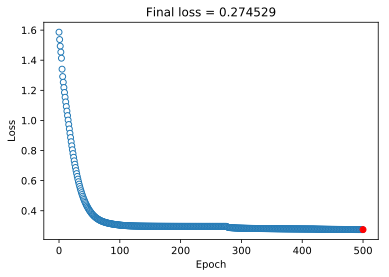

In [88]:
predictions = ANNreg(x)
testlosses = (predictions-y).pow(2).mean()
plt.plot(losses,'o',markerfacecolor='w',linewidth=.1)
plt.plot(epochs,testlosses.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testlosses.item())
plt.show()

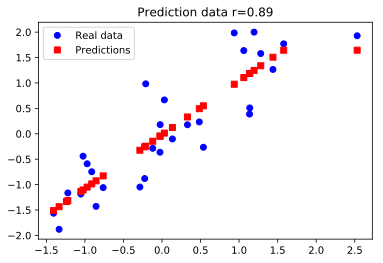

In [89]:
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'rs',label="Predictions")
plt.title(f'Prediction data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()

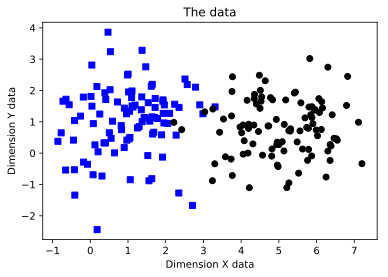

In [90]:
nPerCluster = 100
blur = 1
A = [1, 1]
B = [5, 1]

a = [A[0]+np.random.randn(nPerCluster)*blur, A[1]+np.random.randn(nPerCluster)*blur]
b = [B[0]+np.random.randn(nPerCluster)*blur, B[1]+np.random.randn(nPerCluster)*blur]
labels_np = np.vstack((np.zeros((nPerCluster, 1)), np.ones((nPerCluster, 1))))
data_np = np.hstack((a, b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig = plt.figure()
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], 'bs')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], 'ko')
plt.title('The data')
plt.xlabel('Dimension X data')
plt.ylabel('Dimension Y data')
plt.show()

In [91]:
classifier = nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU(),
    nn.Linear(1,1),
    nn.Sigmoid()
)

classifier

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [92]:
learningrate = .01
lossfun = nn.BCELoss()
optimizer = torch.optim.SGD(classifier.parameters(),lr=learningrate)

In [93]:
numepochs = 1000
losses = np.zeros(numepochs)

for epoch in range(numepochs):
    yHat = classifier(data)
    loss = lossfun(yHat, labels)
    losses[epoch] = loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


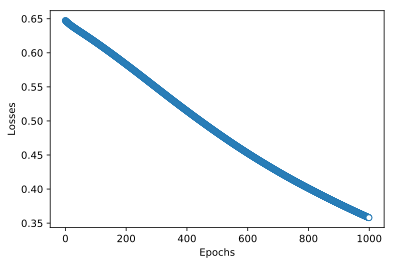

In [94]:
plt.plot(losses,'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.show()

In [95]:
predictions = classifier(data)
predictedLabels = predictions > .5
misclassified = np.where(predictedLabels != labels)[0]
totalacc = 100-100*len(misclassified)/(2*nPerCluster)
print(f'Final accurace: {totalacc}%')

Final accurace: 92.0%


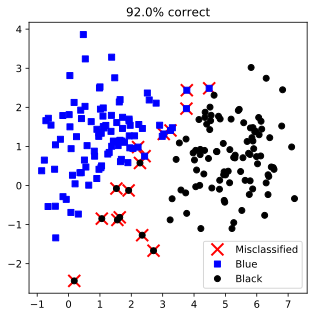

In [96]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0], data[misclassified,1], 'rx', markersize=12, markeredgewidth=2)
plt.plot(data[np.where(~predictedLabels)[0],0], data[np.where(~predictedLabels)[0],1], 'bs')
plt.plot(data[np.where(predictedLabels)[0],0], data[np.where(predictedLabels)[0],1], 'ko')
plt.legend(['Misclassified', 'Blue', 'Black'])
plt.title(f'{totalacc}% correct')
plt.show()

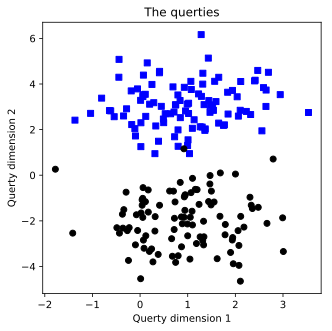

In [97]:
nPerClust = 100
blur = 1
A = [1, 3]
B = [1, -2]

# generate data
a = [A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b = [B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]

labels_np = np.vstack( (np.zeros((nPerClust,1)), np.ones((nPerClust,1))) )
data_np = np.hstack((a,b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1], 'bs')
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1], 'ko')
plt.title('The querties')
plt.xlabel('Querty dimension 1')
plt.ylabel('Querty dimension 2')
plt.show()

In [98]:
def createANNmodel(learningrate):
    ANNclassify = nn.Sequential(
        nn.Linear(2, 16),
        nn.ReLU(),
        nn.Linear(16, 1),
        nn.ReLU(),
        nn.Linear(1, 1),
        nn.Sigmoid()
    )
    lossfunction = nn.BCELoss()
    optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningrate)
    return ANNclassify,lossfunction,optimizer

In [99]:
numepochs = 1000

def trainModel(ANNmodel):
    losses = torch.zeros(numepochs)
    for epoch in range(numepochs):
        yHat = ANNmodel(data)
        loss = lossfun(yHat, labels)
        losses[epoch] = loss
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    predictions = ANNmodel(data)
    totalAccuracy = 100*torch.mean(((predictions > .5) == labels).float())
    
    return losses,predictions,totalAccuracy


final accuracy: 50%


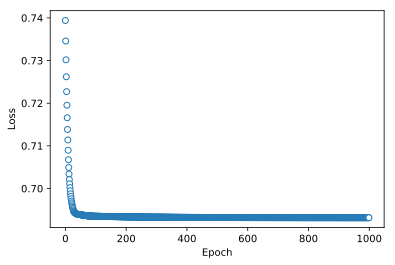

In [100]:
ANNclassify,lossfun,optimizer = createANNmodel(.01)
losses,predictions,totalacc = trainModel(ANNclassify)
print(f'final accuracy: %g%%'%totalacc)

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [101]:
learningrates = np.linspace(.01, .001, 50)
accByLR = []
allLosses = np.zeros((len(learningrates), numepochs))

for index,learningrate in enumerate(learningrates):
    ANNclassify,lossfun,optimizer = createANNmodel(learningrate)
    losses,predictions,totalacc = trainModel(ANNclassify)
    accByLR.append(totalacc)
    allLosses[index,:] = losses.detach()

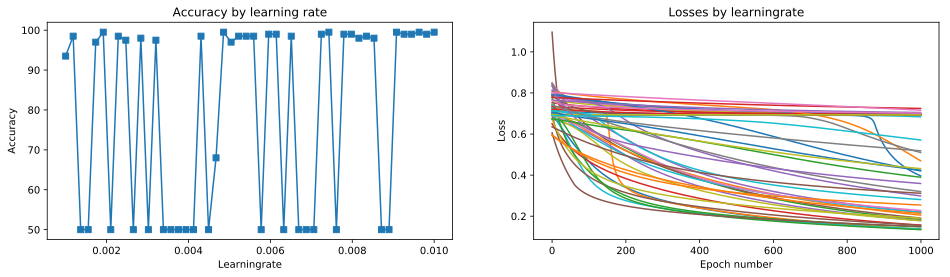

In [102]:
fig,ax = plt.subplots(1,2,figsize=(16,4))

ax[0].plot(learningrates,accByLR,'s-')
ax[0].set_xlabel('Learningrate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T)
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
ax[1].set_title('Losses by learningrate')

plt.show()

In [103]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/home/istvan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


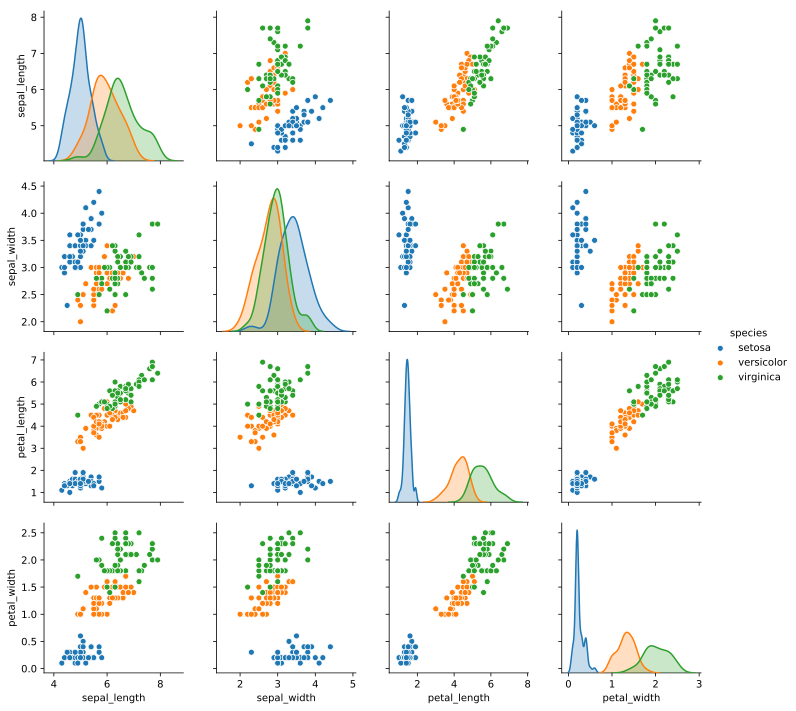

In [104]:
sns.pairplot(iris, hue='species')
plt.show()

In [105]:
data = torch.tensor(iris[iris.columns[0:4]].values).float()
labels = torch.zeros(len(data), dtype=torch.long)

labels[iris.species == 'setosa'] = 0 # not necessary, they are already 0
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

In [106]:
ANNiris = nn.Sequential(
    nn.Linear(4, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 3)
)

lossfun = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.01)

In [107]:
epochs = 1000

losses = torch.zeros(epochs)
ongoingAcc = []

for epochi in range(epochs):
    yHat = ANNiris(data)
    loss = lossfun(yHat, labels)
    losses[epochi] = loss
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    matches = torch.argmax(yHat,axis=1) == labels
    matchesNumeric = matches.float()
    accuracyPct = 100*torch.mean(matchesNumeric)
    ongoingAcc.append(accuracyPct)


In [108]:
predictions = ANNiris(data)
predlabels = torch.argmax(predictions,axis=1)
totalacc = 100*torch.mean((predlabels == labels).float())
print(f'totalacc={totalacc}')

totalacc=98.0


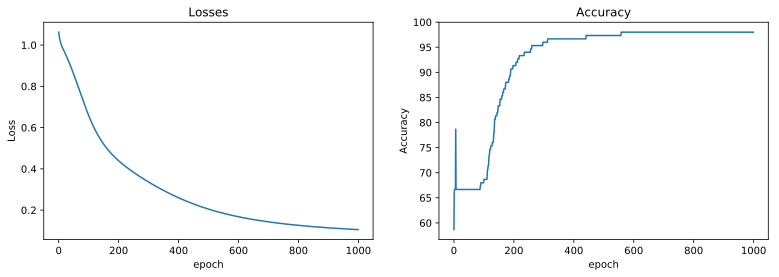

In [109]:
fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')

plt.show()